In [33]:

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [4]:
df = pd.read_csv('oikotie_data_durations.csv')
display(df.head())
print(df.info())

,Id,Rooms,City,Condominium_payment,District,Floor,Construction_year,Living_area,Price,Address,Lat,Lon,Travel_time
0,1.0,2.0,Helsinki,260.0,Vartiokylä,3.0,1964.0,50.0,183880.0,Yläkiventie 3,60.223106,25.073565,27.0
1,2.0,2.0,Helsinki,NaN,Kannelmäki,3.0,2022.0,43.0,251838.0,Vanhaistentie 1 b A12,60.240841,24.886028,28.0
2,3.0,2.0,Helsinki,NaN,Kannelmäki,5.0,2022.0,47.0,265637.0,Vanhaistentie 1 b A19,60.240841,24.886028,28.0
3,4.0,2.0,Helsinki,NaN,Kannelmäki,6.0,2022.0,43.0,265098.0,Vanhaistentie 1 b A28,60.240841,24.886028,28.0
4,5.0,1.0,Helsinki,NaN,Kannelmäki,2.0,2022.0,36.0,216900.0,Vanhaistentie 1 b B29,60.240935,24.885659,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   750 non-null    float64
 1   Rooms                745 non-null    float64
 2   City                 745 non-null    object 
 3   Condominium_payment  617 non-null    float64
 4   District             750 non-null    object 
 5   Floor                501 non-null    float64
 6   Construction_year    535 non-null    float64
 7   Living_area          717 non-null    float64
 8   Price                729 non-null    float64
 9   Address              485 non-null    object 
 10  Lat                  483 non-null    float64
 11  Lon                  483 non-null    float64
 12  Travel_time          455 non-null    float64
dtypes: float64(10), object(3)
memory usage: 76.4+ KB
None


In [47]:
#df  = df.loc[(df.Travel_time.notnull() & df.Price.notnull())]
df =df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 749
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   157 non-null    float64
 1   Rooms                157 non-null    float64
 2   City                 157 non-null    object 
 3   Condominium_payment  157 non-null    float64
 4   District             157 non-null    object 
 5   Floor                157 non-null    float64
 6   Construction_year    157 non-null    float64
 7   Living_area          157 non-null    float64
 8   Price                157 non-null    float64
 9   Address              157 non-null    object 
 10  Lat                  157 non-null    float64
 11  Lon                  157 non-null    float64
 12  Travel_time          157 non-null    float64
dtypes: float64(10), object(3)
memory usage: 17.2+ KB
None


In [48]:
X = pd.get_dummies(df.iloc[:,[1,2,3,4,5,6,7,12]])
#X = pd.get_dummies(df.iloc[:,[1,2,4,7,12]])
y = df.iloc[:,[8]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123)

display(train_X)
display(train_y)

,Rooms,Condominium_payment,Floor,Construction_year,Living_area,Travel_time,City_Espoo,City_Helsinki,District_Espoon keskus,District_Espoonlahti,...,District_Suurpelto,District_Sörnäinen,District_Tapaninkylä,District_Tuomarila,District_Vallikallio,District_Vartiokylä,District_Veräjämäki,District_Viherlaakso,District_Viikinmäki,District_Ymmersta
270,3.0,241.50,1.0,2020.0,57.5,36.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
641,2.0,246.84,2.0,1962.0,52.5,24.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453,2.0,166.00,3.0,2017.0,41.5,34.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,2.0,222.20,5.0,2003.0,50.5,47.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,2.0,273.00,4.0,1977.0,59.5,39.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2.0,268.38,7.0,2005.0,47.5,37.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
518,2.0,248.16,4.0,1964.0,50.5,29.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
395,2.0,168.20,1.0,1956.0,58.0,34.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
631,2.0,201.60,5.0,2012.0,42.0,35.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


,Price
270,248000.0
641,205000.0
453,259000.0
734,187000.0
228,195000.0
...,...
101,239000.0
518,167700.0
395,235000.0
631,199500.0


In [49]:
model = xgboost.XGBRegressor()

param_grid = {"max_depth":    [4, 5, 6, 7, 8],
              "n_estimators": [100, 200, 300, 400, 500],
              "learning_rate": [0.005, 0.01, 0.015]}

search = GridSearchCV(model, param_grid).fit(train_X, train_y)
print("The best hyperparameters are ", search.best_params_)

model = search.best_estimator_

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 400}


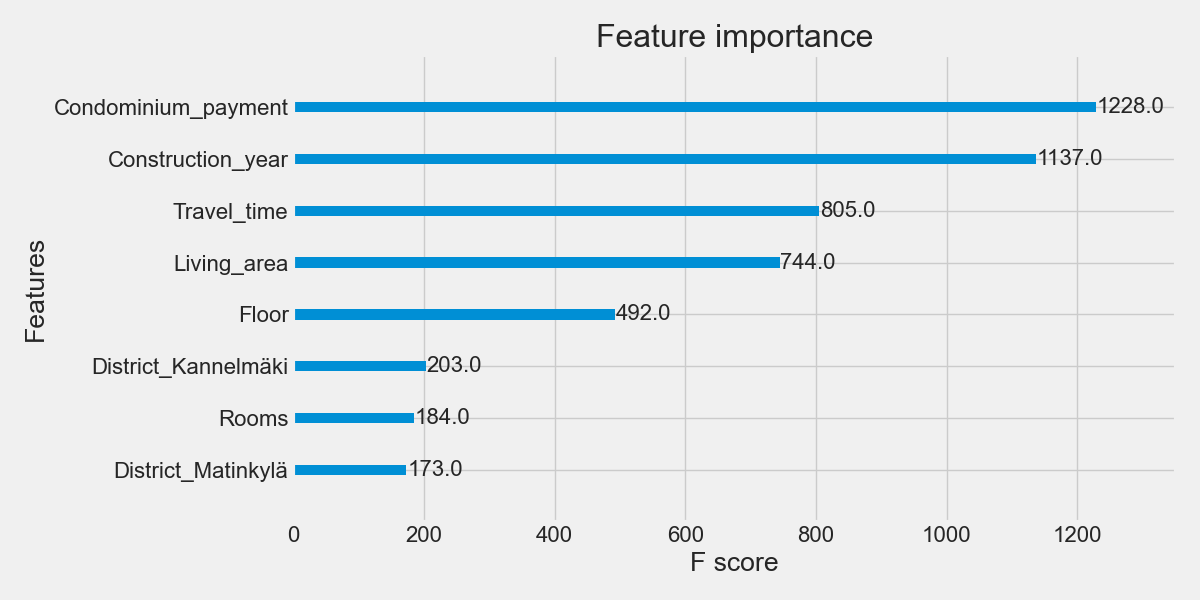

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
xgboost.plot_importance(model, max_num_features=8, ax=ax)
plt.tight_layout()
plt.show()

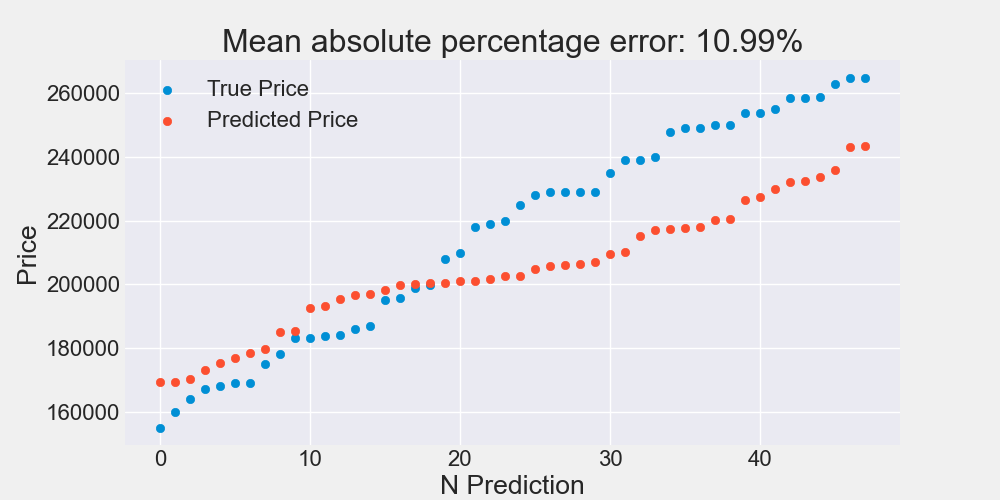

In [51]:
predictions = model.predict(test_X)
mape = mean_absolute_percentage_error(test_y, predictions)*100


plt.figure('Prediction')
plt.clf()
plt.gcf().set_figheight(5)
plt.gcf().set_figwidth(10)
plt.style.use('seaborn-v0_8-darkgrid')

plt.scatter(range(len(test_y)), test_y.sort_values(by='Price'), label='True Price')
plt.scatter(range(len(predictions)), np.sort(predictions), label='Predicted Price')

plt.legend(loc='best')
plt.xlabel('N Prediction')
plt.ylabel('Price')
plt.title(f'Mean absolute percentage error: {mape:.2f}%')
plt.show()